In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [2]:
def plot_category_counts(cat):
    fig, ax = plt.subplots(figsize = (6,3))
    with plt.style.context("fivethirtyeight"):
        df[cat].value_counts(dropna = False).plot(kind = 'bar', ax = ax)
        plt.title(f'Counts of {cat}')
        plt.xticks(rotation=45)
        plt.show()

def plot_samples(cat):
    cat_values = [elem for elem in df[cat].unique().tolist() if elem != None]
    fig, ax = plt.subplots(1, len(cat_values), figsize = (30,5))
    for i, category in enumerate(cat_values):
        sub_df = df[df[cat] == category]
        if sub_df.shape[0] != 0:
            img_path = sub_df.sample(1).sku.item()
            img = Image.open(images_path + img_path + '.jpg')
            ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(category)

In [3]:
DATA_PATH = '../../Data.nosync/'
images_path = f'{DATA_PATH}Zalando_Germany_Dataset/dresses/images/raw_images/'

#### Read in Data

In [4]:
# Read in Metadata
df = pd.read_json(DATA_PATH + 'Zalando_Germany_Dataset/dresses/metadata/dresses_metadata.json').T
df = df.reset_index()
df = df.rename(columns={'index': 'sku'})

# Check all image files available
image_paths = glob(DATA_PATH + 'Zalando_Germany_Dataset/dresses/images/raw_images/*.jpg')
print(f'Number of images: {len(image_paths)}')
# Assign image availability to metadata
df['img_available'] = df['sku'].apply(lambda x: x in [elem.split('/')[-1].replace('.jpg', '') for 
                                                      elem in image_paths])
#df = df[df['img_available'] == True]
df.head()

Number of images: 281


,sku,name,sku_base,sku_color_code,url,brand,brand_url,category,garment_type,fabric,fit,neckline,pattern,collar,length,shape,thumbnail_url,packshot_url,img_available
0,AN621C22S-O11,Jersey dress - brown,AN621C22S,O11,https://en.zalando.de/anna-field-shift-dress-b...,Anna Field,https://en.zalando.de/anna-field/,Shift dress,jersey_dresses,Jersey,Slim Fit,None,Plain,Standing collar,Calf-length,Body-hugging,https://img01.ztat.net/article/spp-media-p1/fb...,https://img01.ztat.net/article/spp-media-p1/c8...,True
1,BU321C01G-K11,Jersey dress - marine/bedruckt,BU321C01G,K11,https://en.zalando.de/buffalo-jersey-dress-mar...,Buffalo,https://en.zalando.de/buffalo/,Jersey dress,jersey_dresses,Jersey,Regular Fit,Low-cut v-neck,Print,None,Knee-length,Fitted,https://img01.ztat.net/article/spp-media-p1/50...,https://img01.ztat.net/article/spp-media-p1/17...,True
2,JY121C0TB-A11,JDYCARLA CATHINKA DRESS - Jersey dress - cloud...,JY121C0TB,A11,https://en.zalando.de/jdy-carla-cathinka-dress...,JDY,https://en.zalando.de/jacqueline-de-yong/,Jersey dress,jersey_dresses,None,Regular Fit,Crew neck,Plain,Standing collar,Knee-length,Flared,https://img01.ztat.net/article/spp-media-p1/20...,https://img01.ztat.net/article/spp-media-p1/20...,True
3,AN621C1UQ-Q11,Jersey dress - black gold,AN621C1UQ,Q11,https://en.zalando.de/anna-field-jersey-dress-...,Anna Field,https://en.zalando.de/anna-field/,Jersey dress,jersey_dresses,Jersey,Slim Fit,Crew neck,Floral,None,Short,Fitted,https://img01.ztat.net/article/spp-media-p1/18...,https://img01.ztat.net/article/spp-media-p1/2c...,True
4,SHI21C0KH-K11,Jersey dress - marine,SHI21C0KH,K11,https://en.zalando.de/sheego-jersey-dress-mari...,Sheego,https://en.zalando.de/sheego/,Jersey dress,jersey_dresses,Chiffon,Regular Fit,V-neck,Plain,None,Knee-length,Flared,https://img01.ztat.net/article/spp-media-p1/db...,https://img01.ztat.net/article/spp-media-p1/e8...,True


### Check some examples

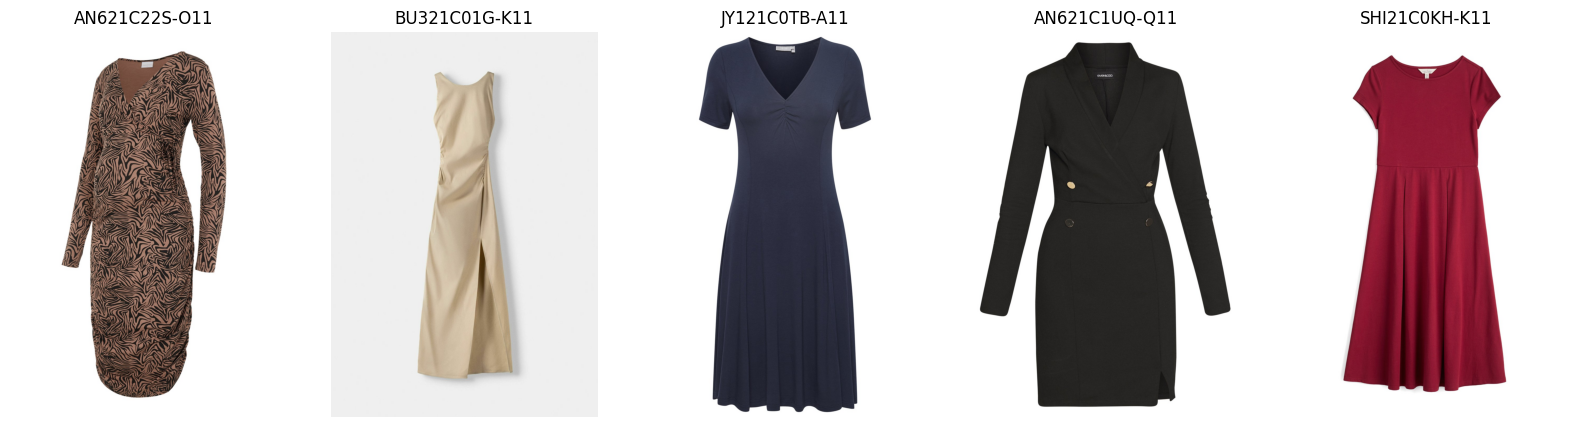

In [5]:
num_samples = 5
fig, ax = plt.subplots(1, num_samples, figsize=(20, 5))
skus = np.random.choice(df[df.img_available == True].sku, num_samples, replace=False)
for i, sku in enumerate(skus):
    img_path = DATA_PATH + 'Zalando_Germany_Dataset/dresses/images/raw_images/' + sku + '.jpg'
    img = plt.imread(img_path)
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(df.iloc[i].sku)